In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Only for info, not used. Values are computed in a different script, and stored in "validation_data"
#Old:
def _bottom_value(u,dz):
    bi=np.where(dz>1)[0]
    if len(bi>0):           # this condition seems to contain an error
        return u[bi[-1]]
    else:
        return np.nan
    
#New:
def _bottom_value(u,dz):
    bi=np.where(dz>1)[0]
    if len(bi)>0:           # updated condition. Checks if there are any indices where the layer thickness is greater than 1
        return u[bi[-1]]
    else:
        return np.nan

In [34]:
ds_old = xr.open_mfdataset("validation_data/old*.nc")
ds_new = xr.open_mfdataset("validation_data/new*.nc")

In [35]:
ds_old.coords

Coordinates:
  * time     (time) object 2020-01-01 12:00:00 ... 2020-04-30 12:00:00
  * y        (y) float64 0.0 2e+03 4e+03 6e+03 ... 1.018e+06 1.02e+06 1.022e+06

In [36]:
ds_new.coords

Coordinates:
  * time     (time) object 2020-01-01 12:00:00 ... 2020-04-30 12:00:00
  * y        (y) float64 0.0 2e+03 4e+03 6e+03 ... 1.018e+06 1.02e+06 1.022e+06

In [37]:
ds_old = ds_old.mean("time")
ds_new = ds_new.mean("time")

Text(0.5, 0, 'y index')

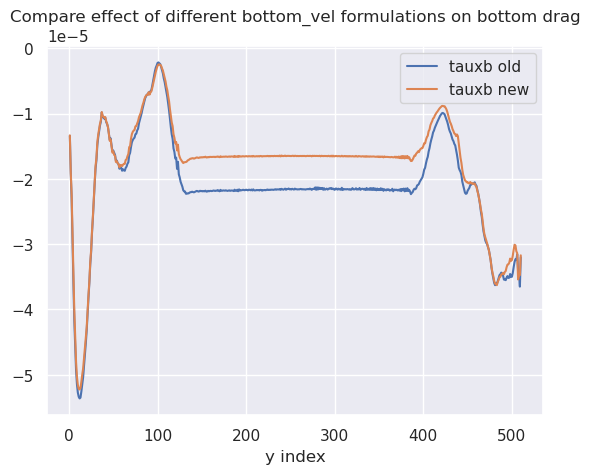

In [39]:
sns.set_theme()
fig, ax = plt.subplots()

ax.plot(ds_old.tauxb1, label="tauxb old")
ax.plot(ds_new.tauxb1, label="tauxb new")
ax.legend()
ax.set_title("Compare effect of different bottom_vel formulations on bottom drag")
ax.set_xlabel("y index")